Load Market Data

In [1]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/tanishk.deoghare/OneDrive - Angel Oak Capital Advisors/Desktop/Libor Market Models/LiborMarketModels/Input Curves 3.xlsx"
xls = pd.ExcelFile(file_path)

In [2]:
# Extract data from each sheet into separate dataframes
df_us_dollar_swaps = pd.read_excel(xls, sheet_name='US Dollar Swaps')
# df_us_treasury_active_curve = pd.read_excel(xls, sheet_name='US Treasury Active Curve')
df_ir_atm_vol_curve = pd.read_excel(xls, sheet_name='IR ATM Vol Curve')
df_ir_vol_skew_curve = pd.read_excel(xls, sheet_name='IR Vol Skew Curve')
df_ir_atm_vol_corr = pd.read_excel(xls, sheet_name='IR Vol Corr Matrix')

In [3]:
df_us_dollar_swaps.head()

,Tenors,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,1Yr,4.3540,3.9602,3.8389,3.8324,3.8745,4.0666,3.9192,2.4386
1,2Yr,4.1617,3.9006,3.8358,3.8531,3.8890,4.0721,3.9139,2.4419
2,3Yr,4.0583,3.8787,3.8482,3.8695,3.9067,4.0854,3.9122,2.4408
3,4Yr,4.0048,3.8752,3.8615,3.8817,3.9249,4.0920,3.9113,2.4387
4,5Yr,3.9806,3.8807,3.8768,3.9050,3.9448,4.0959,3.9128,2.4387


In [4]:
df_us_dollar_swaps

,Tenors,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,1Yr,4.3540,3.9602,3.8389,3.8324,3.8745,4.0666,3.9192,2.4386
1,2Yr,4.1617,3.9006,3.8358,3.8531,3.8890,4.0721,3.9139,2.4419
2,3Yr,4.0583,3.8787,3.8482,3.8695,3.9067,4.0854,3.9122,2.4408
3,4Yr,4.0048,3.8752,3.8615,3.8817,3.9249,4.0920,3.9113,2.4387
4,5Yr,3.9806,3.8807,3.8768,3.9050,3.9448,4.0959,3.9128,2.4387
5,10Yr,3.9817,3.9424,3.9567,3.9841,4.0133,4.0128,3.6703,2.4388
6,15Yr,4.0058,3.9679,3.9677,3.9760,3.9858,3.8382,3.5006,2.2251
7,30Yr,3.7837,3.7232,3.6853,3.6510,3.6155,3.3840,2.9840,2.0082


In [5]:
df_ir_atm_vol_curve.head()

,Expiry,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,1Yr,119.65,119.21,116.26,113.80,111.66,104.10,99.61,92.21
1,2Yr,118.18,115.87,112.90,110.99,108.89,101.66,97.30,90.59
2,3Yr,114.19,112.11,109.68,107.86,106.18,99.21,95.06,88.76
3,4Yr,110.58,108.03,105.98,104.63,103.14,96.72,92.76,87.12
4,5Yr,106.76,104.64,102.94,101.56,100.32,94.78,90.97,85.68


In [6]:
df_ir_atm_vol_curve.iloc[:,1:]

,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,119.65,119.21,116.26,113.80,111.66,104.10,99.61,92.21
1,118.18,115.87,112.90,110.99,108.89,101.66,97.30,90.59
2,114.19,112.11,109.68,107.86,106.18,99.21,95.06,88.76
3,110.58,108.03,105.98,104.63,103.14,96.72,92.76,87.12
4,106.76,104.64,102.94,101.56,100.32,94.78,90.97,85.68
5,94.19,92.08,90.25,89.03,87.68,82.73,79.16,75.71
6,83.48,82.28,80.82,79.44,77.97,73.16,70.06,67.60
7,70.06,69.75,68.49,67.24,65.84,59.32,58.56,57.98


In [7]:
# df_ir_atm_vol_curve[['Coupon','1Yr','2Yr','3Yr','4Yr','5Yr','10Yr','15Yr','30Yr']]

In [8]:
df_ir_vol_skew_curve.head()

,Expiry,-300bps,-200bps,-100bps,-50bps,-25bps,ATM,25bps,50bps,100bps,200bps,300bps
0,1Mo,155.88,132.50,109.27,100.23,97.62,96.96,98.51,102.05,113.10,141.18,170.60
1,3Mo,159.55,135.99,112.67,103.67,101.08,100.42,101.94,105.44,116.45,144.71,174.47
2,6Mo,140.06,123.42,108.70,104.32,103.57,104.03,105.71,108.52,116.68,138.15,161.71
3,9Mo,131.68,118.07,106.76,103.85,103.57,104.21,105.76,108.17,115.03,133.34,153.88
4,1Yr,122.34,112.18,104.59,103.15,103.30,104.10,105.53,107.56,113.13,128.05,145.20


In [9]:
import pandas as pd
import numpy as np

# Data from the table
data = {
    'Tenors': ['1Yr', '2Yr', '3Yr', '4Yr', '5Yr', '10Yr', '15Yr', '30Yr'],
    '1Yr': [4.354, 4.1617, 4.0583, 4.0048, 3.9806, 3.9817, 4.0058, 3.7837],
    '2Yr': [3.9602, 3.9006, 3.8787, 3.8752, 3.8807, 3.9424, 3.9679, 3.7232],
    '3Yr': [3.8389, 3.8358, 3.8482, 3.8615, 3.8768, 3.9567, 3.9677, 3.6853],
    '4Yr': [3.8324, 3.8531, 3.8695, 3.8817, 3.905, 3.9841, 3.976, 3.651],
    '5Yr': [3.8745, 3.889, 3.9067, 3.9249, 3.9448, 4.0133, 3.9858, 3.6155],
    '10Yr': [4.0666, 4.0721, 4.0854, 4.092, 4.0959, 4.0128, 3.8382, 3.384],
    '15Yr': [3.9192, 3.9139, 3.9122, 3.9113, 3.9128, 3.6703, 3.5006, 2.984],
    '30Yr': [2.4386, 2.4419, 2.4408, 2.4387, 2.4387, 2.4388, 2.2251, 2.0082]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Calculate log returns
log_returns = np.log(df.iloc[:, 1:] / df.iloc[:, 1:].shift(1))

# Drop the first row because log returns will be NaN for the first observation
log_returns = log_returns.dropna()

# Compute the correlation matrix
correlation_matrix = log_returns.corr()

print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
1Yr,1.000000,0.884014,0.755710,0.691515,0.674806,0.454232,0.403791,0.202167
2Yr,0.884014,1.000000,0.973796,0.946848,0.937162,0.777461,0.696879,0.567374
3Yr,0.755710,0.973796,1.000000,0.994547,0.990353,0.881651,0.798570,0.704911
4Yr,0.691515,0.946848,0.994547,1.000000,0.998377,0.917716,0.838706,0.756440
5Yr,0.674806,0.937162,0.990353,0.998377,1.000000,0.936749,0.863278,0.778322
10Yr,0.454232,0.777461,0.881651,0.917716,0.936749,1.000000,0.968835,0.881356
15Yr,0.403791,0.696879,0.798570,0.838706,0.863278,0.968835,1.000000,0.775807
30Yr,0.202167,0.567374,0.704911,0.756440,0.778322,0.881356,0.775807,1.000000


In [10]:
import pandas as pd

# Data as provided by the user
data = [
    [1, 0.989631024, 0.961827666, 0.925019189, 0.883057414, 0.708175774, 0.701037988, 0.636869912],
    [0.989631024, 1, 0.989940305, 0.965473539, 0.93208378, 0.770832664, 0.741904402, 0.672833134],
    [0.961827666, 0.989940305, 1, 0.992167066, 0.972137142, 0.840834961, 0.783714285, 0.708048232],
    [0.925019189, 0.965473539, 0.992167066, 1, 0.993626042, 0.897926876, 0.80222771, 0.706528544],
    [0.883057414, 0.93208378, 0.972137142, 0.993626042, 1, 0.940556473, 0.843565858, 0.742117703],
    [0.708175774, 0.770832664, 0.840834961, 0.897926876, 0.940556473, 1, 0.878103763, 0.766536803],
    [0.701037988, 0.741904402, 0.783714285, 0.80222771, 0.843565858, 0.878103763, 1, 0.790955902],
    [0.636869912, 0.672833134, 0.708048232, 0.706528544, 0.742117703, 0.766536803, 0.790955902, 1]
]

# Column and row labels
labels = ['1Y', '2Y', '3Y', '4Y', '5Y', '10Y', '15Y', '30Y']

# Creating the DataFrame
df = pd.DataFrame(data, columns=labels, index=labels)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Interest Rate Correlation Matrix", dataframe=df)



In [11]:
correlation_matrix = df

In [12]:
import numpy as np
import pandas as pd

def make_positive_definite(matrix, epsilon=1e-4):
    """ Adjust the matrix to be positive definite by adding a small value to the diagonal """
    matrix = matrix.copy()
    np.fill_diagonal(matrix.values, matrix.values.diagonal() + epsilon)
    return matrix

# Ensure the correlation matrix is positive definite
correlation_matrix_pd = make_positive_definite(correlation_matrix)

# Verify if the adjusted matrix is positive definite
def is_positive_definite(matrix):
    """ Check if the matrix is positive definite """
    try:
        np.linalg.cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

print("Is the correlation matrix positive definite?", is_positive_definite(correlation_matrix_pd))


Is the correlation matrix positive definite? False


In [13]:
correlation_matrix_pd

,1Y,2Y,3Y,4Y,5Y,10Y,15Y,30Y
1Y,1.000100,0.989631,0.961828,0.925019,0.883057,0.708176,0.701038,0.636870
2Y,0.989631,1.000100,0.989940,0.965474,0.932084,0.770833,0.741904,0.672833
3Y,0.961828,0.989940,1.000100,0.992167,0.972137,0.840835,0.783714,0.708048
4Y,0.925019,0.965474,0.992167,1.000100,0.993626,0.897927,0.802228,0.706529
5Y,0.883057,0.932084,0.972137,0.993626,1.000100,0.940556,0.843566,0.742118
10Y,0.708176,0.770833,0.840835,0.897927,0.940556,1.000100,0.878104,0.766537
15Y,0.701038,0.741904,0.783714,0.802228,0.843566,0.878104,1.000100,0.790956
30Y,0.636870,0.672833,0.708048,0.706529,0.742118,0.766537,0.790956,1.000100


In [14]:
import numpy as np
import pandas as pd

# Data as provided by the user
data = [
    [1, 0.989631024, 0.961827666, 0.925019189, 0.883057414, 0.708175774, 0.701037988, 0.636869912],
    [0.989631024, 1, 0.989940305, 0.965473539, 0.93208378, 0.770832664, 0.741904402, 0.672833134],
    [0.961827666, 0.989940305, 1, 0.992167066, 0.972137142, 0.840834961, 0.783714285, 0.708048232],
    [0.925019189, 0.965473539, 0.992167066, 1, 0.993626042, 0.897926876, 0.80222771, 0.706528544],
    [0.883057414, 0.93208378, 0.972137142, 0.993626042, 1, 0.940556473, 0.843565858, 0.742117703],
    [0.708175774, 0.770832664, 0.840834961, 0.897926876, 0.940556473, 1, 0.878103763, 0.766536803],
    [0.701037988, 0.741904402, 0.783714285, 0.80222771, 0.843565858, 0.878103763, 1, 0.790955902],
    [0.636869912, 0.672833134, 0.708048232, 0.706528544, 0.742117703, 0.766536803, 0.790955902, 1]
]

# Column and row labels
labels = ['1Y', '2Y', '3Y', '4Y', '5Y', '10Y', '15Y', '30Y']

# Creating the DataFrame
df = pd.DataFrame(data, columns=labels, index=labels)
correlation_matrix = df

def higham_algorithm(matrix, tol=1e-6, max_iterations=100):
    """ 
    Adjust the matrix to be positive definite using the Higham algorithm.
    """
    n = matrix.shape[0]
    W = np.identity(n)
    delta_s = 0
    Y = matrix.copy()
    for _ in range(max_iterations):
        R = Y - delta_s * W
        X = (R + R.T) / 2
        eigvals, eigvecs = np.linalg.eigh(X)
        eigvals[eigvals < tol] = tol
        Y = eigvecs @ np.diag(eigvals) @ eigvecs.T
        delta_s = np.trace(Y - matrix) / n
        if np.all(np.linalg.eigvals(Y) > 0):
            break
    return Y

# Ensure the correlation matrix is positive definite
correlation_matrix_pd = higham_algorithm(correlation_matrix.values)

# Verify if the adjusted matrix is positive definite
def is_positive_definite(matrix):
    """ Check if the matrix is positive definite """
    try:
        np.linalg.cholesky(matrix)
        return True
    except np.linalg.LinAlgError:
        return False

print("Is the correlation matrix positive definite?", is_positive_definite(correlation_matrix_pd))

# Convert the adjusted matrix back to a DataFrame for easier viewing
correlation_matrix_pd_df = pd.DataFrame(correlation_matrix_pd, columns=labels, index=labels)
print(correlation_matrix_pd_df)


Is the correlation matrix positive definite? True
           1Y        2Y        3Y        4Y        5Y       10Y       15Y  \
1Y   1.000023  0.989591  0.961741  0.925171  0.883024  0.708144  0.701048   
2Y   0.989591  1.000070  0.990091  0.965211  0.932142  0.770887  0.741888   
3Y   0.961741  0.990091  1.000325  0.991600  0.972262  0.840953  0.783678   
4Y   0.925171  0.965211  0.991600  1.000987  0.993408  0.897721  0.802290   
5Y   0.883024  0.932142  0.972262  0.993408  1.000048  0.940602  0.843552   
10Y  0.708144  0.770887  0.840953  0.897721  0.940602  1.000043  0.878091   
15Y  0.701048  0.741888  0.783678  0.802290  0.843552  0.878091  1.000004   
30Y  0.636878  0.672819  0.708017  0.706582  0.742106  0.766526  0.790959   

          30Y  
1Y   0.636878  
2Y   0.672819  
3Y   0.708017  
4Y   0.706582  
5Y   0.742106  
10Y  0.766526  
15Y  0.790959  
30Y  1.000003  


In [15]:
correlation_matrix_pd_df


,1Y,2Y,3Y,4Y,5Y,10Y,15Y,30Y
1Y,1.000023,0.989591,0.961741,0.925171,0.883024,0.708144,0.701048,0.636878
2Y,0.989591,1.000070,0.990091,0.965211,0.932142,0.770887,0.741888,0.672819
3Y,0.961741,0.990091,1.000325,0.991600,0.972262,0.840953,0.783678,0.708017
4Y,0.925171,0.965211,0.991600,1.000987,0.993408,0.897721,0.802290,0.706582
5Y,0.883024,0.932142,0.972262,0.993408,1.000048,0.940602,0.843552,0.742106
10Y,0.708144,0.770887,0.840953,0.897721,0.940602,1.000043,0.878091,0.766526
15Y,0.701048,0.741888,0.783678,0.802290,0.843552,0.878091,1.000004,0.790959
30Y,0.636878,0.672819,0.708017,0.706582,0.742106,0.766526,0.790959,1.000003


In [16]:
import numpy as np

# Model parameters
n_periods = 10  # Number of periods (e.g., 10 years)
dt = 1/252  # Time step (daily)

maturity = [1,2,3,4,5,10,15,30]  # Maturities in years
initial_forward_rates = np.array([5.3207,4.8463,4.5636,4.3929,4.2889,4.1324,4.1224,3.8924])  # Initial forward rates

volatility = df_ir_atm_vol_curve.iloc[:,1:]

In [17]:
volatility

,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,119.65,119.21,116.26,113.80,111.66,104.10,99.61,92.21
1,118.18,115.87,112.90,110.99,108.89,101.66,97.30,90.59
2,114.19,112.11,109.68,107.86,106.18,99.21,95.06,88.76
3,110.58,108.03,105.98,104.63,103.14,96.72,92.76,87.12
4,106.76,104.64,102.94,101.56,100.32,94.78,90.97,85.68
5,94.19,92.08,90.25,89.03,87.68,82.73,79.16,75.71
6,83.48,82.28,80.82,79.44,77.97,73.16,70.06,67.60
7,70.06,69.75,68.49,67.24,65.84,59.32,58.56,57.98


In [18]:
initial_forward_rates

array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924])

In [19]:
volatility

,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
0,119.65,119.21,116.26,113.80,111.66,104.10,99.61,92.21
1,118.18,115.87,112.90,110.99,108.89,101.66,97.30,90.59
2,114.19,112.11,109.68,107.86,106.18,99.21,95.06,88.76
3,110.58,108.03,105.98,104.63,103.14,96.72,92.76,87.12
4,106.76,104.64,102.94,101.56,100.32,94.78,90.97,85.68
5,94.19,92.08,90.25,89.03,87.68,82.73,79.16,75.71
6,83.48,82.28,80.82,79.44,77.97,73.16,70.06,67.60
7,70.06,69.75,68.49,67.24,65.84,59.32,58.56,57.98


In [20]:
volatility = np.matrix(volatility)

In [21]:
volatility

matrix([[119.65, 119.21, 116.26, 113.8 , 111.66, 104.1 ,  99.61,  92.21],
        [118.18, 115.87, 112.9 , 110.99, 108.89, 101.66,  97.3 ,  90.59],
        [114.19, 112.11, 109.68, 107.86, 106.18,  99.21,  95.06,  88.76],
        [110.58, 108.03, 105.98, 104.63, 103.14,  96.72,  92.76,  87.12],
        [106.76, 104.64, 102.94, 101.56, 100.32,  94.78,  90.97,  85.68],
        [ 94.19,  92.08,  90.25,  89.03,  87.68,  82.73,  79.16,  75.71],
        [ 83.48,  82.28,  80.82,  79.44,  77.97,  73.16,  70.06,  67.6 ],
        [ 70.06,  69.75,  68.49,  67.24,  65.84,  59.32,  58.56,  57.98]])

In [22]:
volatility = np.array(volatility)

In [23]:
volatility

array([[119.65, 119.21, 116.26, 113.8 , 111.66, 104.1 ,  99.61,  92.21],
       [118.18, 115.87, 112.9 , 110.99, 108.89, 101.66,  97.3 ,  90.59],
       [114.19, 112.11, 109.68, 107.86, 106.18,  99.21,  95.06,  88.76],
       [110.58, 108.03, 105.98, 104.63, 103.14,  96.72,  92.76,  87.12],
       [106.76, 104.64, 102.94, 101.56, 100.32,  94.78,  90.97,  85.68],
       [ 94.19,  92.08,  90.25,  89.03,  87.68,  82.73,  79.16,  75.71],
       [ 83.48,  82.28,  80.82,  79.44,  77.97,  73.16,  70.06,  67.6 ],
       [ 70.06,  69.75,  68.49,  67.24,  65.84,  59.32,  58.56,  57.98]])

In [24]:
correlation_matrix_pd = np.matrix(correlation_matrix_pd)

In [25]:
correlation_matrix_pd

matrix([[1.00002335, 0.98959058, 0.96174051, 0.92517103, 0.88302389,
         0.70814413, 0.70104764, 0.63687818],
        [0.98959058, 1.00007004, 0.99009125, 0.96521057, 0.93214184,
         0.77088747, 0.74188769, 0.67281882],
        [0.96174051, 0.99009125, 1.00032531, 0.99160033, 0.97226227,
         0.84095308, 0.78367828, 0.70801738],
        [0.92517103, 0.96521057, 0.99160033, 1.00098732, 0.99340806,
         0.89772109, 0.80229044, 0.7065823 ],
        [0.88302389, 0.93214184, 0.97226227, 0.99340806, 1.00004813,
         0.94060191, 0.84355201, 0.74210584],
        [0.70814413, 0.77088747, 0.84095308, 0.89772109, 0.94060191,
         1.00004289, 0.87809069, 0.7665256 ],
        [0.70104764, 0.74188769, 0.78367828, 0.80229044, 0.84355201,
         0.87809069, 1.00000399, 0.79095932],
        [0.63687818, 0.67281882, 0.70801738, 0.7065823 , 0.74210584,
         0.7665256 , 0.79095932, 1.00000293]])

In [26]:
correlation_matrix_pd = np.array(correlation_matrix_pd)

In [27]:
correlation_matrix_pd

array([[1.00002335, 0.98959058, 0.96174051, 0.92517103, 0.88302389,
        0.70814413, 0.70104764, 0.63687818],
       [0.98959058, 1.00007004, 0.99009125, 0.96521057, 0.93214184,
        0.77088747, 0.74188769, 0.67281882],
       [0.96174051, 0.99009125, 1.00032531, 0.99160033, 0.97226227,
        0.84095308, 0.78367828, 0.70801738],
       [0.92517103, 0.96521057, 0.99160033, 1.00098732, 0.99340806,
        0.89772109, 0.80229044, 0.7065823 ],
       [0.88302389, 0.93214184, 0.97226227, 0.99340806, 1.00004813,
        0.94060191, 0.84355201, 0.74210584],
       [0.70814413, 0.77088747, 0.84095308, 0.89772109, 0.94060191,
        1.00004289, 0.87809069, 0.7665256 ],
       [0.70104764, 0.74188769, 0.78367828, 0.80229044, 0.84355201,
        0.87809069, 1.00000399, 0.79095932],
       [0.63687818, 0.67281882, 0.70801738, 0.7065823 , 0.74210584,
        0.7665256 , 0.79095932, 1.00000293]])

In [28]:
correlation_matrix_pd_df = np.array(correlation_matrix_pd_df)

In [29]:
correlation_matrix_pd_df

array([[1.00002335, 0.98959058, 0.96174051, 0.92517103, 0.88302389,
        0.70814413, 0.70104764, 0.63687818],
       [0.98959058, 1.00007004, 0.99009125, 0.96521057, 0.93214184,
        0.77088747, 0.74188769, 0.67281882],
       [0.96174051, 0.99009125, 1.00032531, 0.99160033, 0.97226227,
        0.84095308, 0.78367828, 0.70801738],
       [0.92517103, 0.96521057, 0.99160033, 1.00098732, 0.99340806,
        0.89772109, 0.80229044, 0.7065823 ],
       [0.88302389, 0.93214184, 0.97226227, 0.99340806, 1.00004813,
        0.94060191, 0.84355201, 0.74210584],
       [0.70814413, 0.77088747, 0.84095308, 0.89772109, 0.94060191,
        1.00004289, 0.87809069, 0.7665256 ],
       [0.70104764, 0.74188769, 0.78367828, 0.80229044, 0.84355201,
        0.87809069, 1.00000399, 0.79095932],
       [0.63687818, 0.67281882, 0.70801738, 0.7065823 , 0.74210584,
        0.7665256 , 0.79095932, 1.00000293]])

In [30]:
volatility = volatility/100

In [31]:
volatility

array([[1.1965, 1.1921, 1.1626, 1.138 , 1.1166, 1.041 , 0.9961, 0.9221],
       [1.1818, 1.1587, 1.129 , 1.1099, 1.0889, 1.0166, 0.973 , 0.9059],
       [1.1419, 1.1211, 1.0968, 1.0786, 1.0618, 0.9921, 0.9506, 0.8876],
       [1.1058, 1.0803, 1.0598, 1.0463, 1.0314, 0.9672, 0.9276, 0.8712],
       [1.0676, 1.0464, 1.0294, 1.0156, 1.0032, 0.9478, 0.9097, 0.8568],
       [0.9419, 0.9208, 0.9025, 0.8903, 0.8768, 0.8273, 0.7916, 0.7571],
       [0.8348, 0.8228, 0.8082, 0.7944, 0.7797, 0.7316, 0.7006, 0.676 ],
       [0.7006, 0.6975, 0.6849, 0.6724, 0.6584, 0.5932, 0.5856, 0.5798]])

In [32]:
initial_forward_rates

array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924])

In [33]:
dt

0.003968253968253968

In [34]:
def calculate_drift(forward_rates, volatility, correlation_matrix, dt):
    n_rates = len(forward_rates)
    drift = np.zeros(n_rates)
    for i in range(n_rates):
        sum_term = 0
        for j in range(i+1, n_rates):
            sum_term += (volatility[j, j] * correlation_matrix[i, j] * dt) / (1 + dt * forward_rates[j])
        drift[i] = -volatility[i, i] * sum_term
    return drift

# Calculate the drift term
drift_terms = calculate_drift(initial_forward_rates, volatility, correlation_matrix_pd, dt)


In [35]:

# Print the drift terms
print("Drift Terms:")
print(drift_terms)

Drift Terms:
[-0.02567163 -0.02069899 -0.01570232 -0.01107373 -0.00704952 -0.00342397
 -0.00125558 -0.        ]


In [36]:
def simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps):
    n_rates = len(initial_forward_rates)
    
    forward_rates = np.zeros((n_steps, n_rates))
    
    forward_rates[0] = initial_forward_rates
    
    # Cholesky decomposition for correlated Brownian motions
    L = np.linalg.cholesky(correlation_matrix)
    for t in range(1, n_steps):
        Z = np.random.normal(size=n_rates)
        dW = L @ Z * np.sqrt(dt)
        for i in range(n_rates):
            # drift = -0.5 * (volatility[i, i])**2
            drift = drift_terms[i]
            # drift = 0.000001
            diffusion = np.sqrt(volatility[i, i]) * dW[i]
            # print(dW[i],t, i)
            forward_rates[t, i] = forward_rates[t-1, i] * np.exp(drift * dt + diffusion)
    return forward_rates

n_steps = 100
simulated_forward_rates = simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix_pd_df, dt, n_steps)


In [37]:
correlation_matrix = (correlation_matrix + correlation_matrix.T) / 2


In [38]:
simulated_forward_rates

array([[5.3207    , 4.8463    , 4.5636    , 4.3929    , 4.2889    ,
        4.1324    , 4.1224    , 3.8924    ],
       [5.25882151, 4.74826745, 4.42127425, 4.19271314, 4.08364568,
        3.88882498, 4.15741759, 3.86043057],
       [5.59571165, 5.09554962, 4.76915683, 4.51585403, 4.41158612,
        4.16997783, 4.4019554 , 4.22542222],
       [5.6309538 , 5.1685761 , 4.86758848, 4.61097711, 4.53193466,
        4.29818956, 4.60610562, 4.39690153],
       [6.12134509, 5.52077651, 5.09138857, 4.74521919, 4.62786212,
        4.33434797, 4.8202077 , 4.66098909],
       [5.28495578, 4.80907974, 4.47417981, 4.20921148, 4.13063171,
        3.99391125, 4.43555198, 4.37825224],
       [5.08956322, 4.68915793, 4.41884853, 4.17773838, 4.14203594,
        4.07669679, 4.58038374, 4.53000724],
       [4.72882034, 4.35449822, 4.11912484, 3.92744331, 3.8964187 ,
        3.88847725, 4.23014313, 4.268167  ],
       [4.8833838 , 4.41342725, 4.08108948, 3.83503083, 3.77098537,
        3.74306634, 4.274163

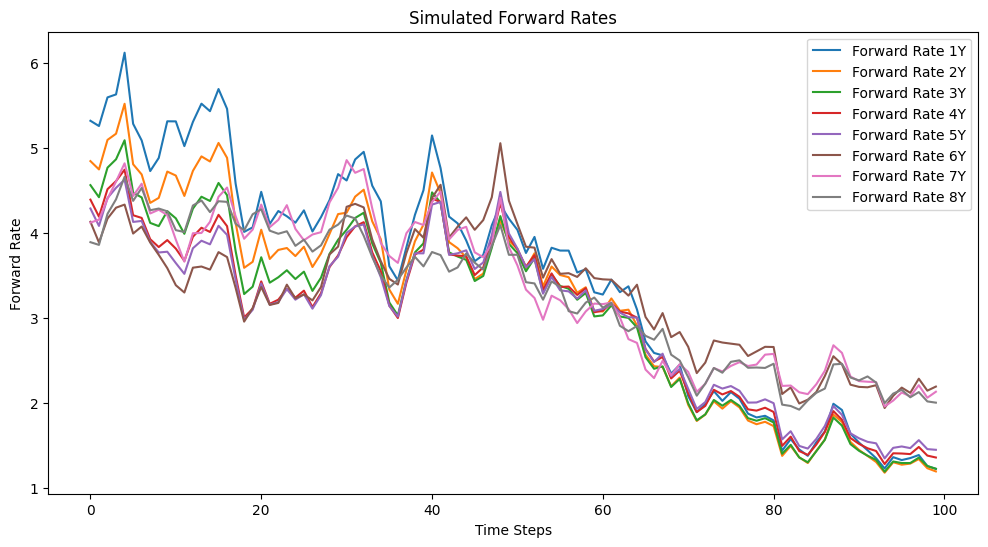

In [39]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(12, 6))
for i in range(simulated_forward_rates.shape[1]):
    plt.plot(simulated_forward_rates[:, i], label=f'Forward Rate {i+1}Y')
plt.title('Simulated Forward Rates')
plt.xlabel('Time Steps')
plt.ylabel('Forward Rate')
plt.legend()
plt.show()


In [40]:
def cost_function(params, initial_forward_rates, correlation_matrix, dt, n_steps, market_forward_rates):
    # Reshape the parameters to get volatility
    volatility = params.reshape(correlation_matrix.shape)
    
    # Simulate forward rates with the current volatility
    simulated_forward_rates = simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps)
    
    # Only consider the last row (final predicted forward rates)
    predicted_forward_rates = simulated_forward_rates[-1]
    
    # Calculate the sum of squared differences
    cost = np.sum((predicted_forward_rates - market_forward_rates) ** 2)
    
    return cost


In [41]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Define model parameters
n_steps = 100
dt = 1 / 252
initial_forward_rates = np.array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924]) / 100  # in decimal

# Market observed forward rates
market_forward_rates = df_us_dollar_swaps.iloc[:, 1].to_numpy() / 100  # in decimal

# Flatten initial volatility to use in the optimization
initial_volatility_flat = volatility.flatten()

# Perform the optimization
result = minimize(
    cost_function, 
    initial_volatility_flat, 
    args=(initial_forward_rates, correlation_matrix_pd_df, dt, n_steps, market_forward_rates), 
    method='L-BFGS-B'
)

# Reshape the optimized parameters to get the calibrated volatility
calibrated_volatility = result.x.reshape(volatility.shape)

# Print the calibrated volatility
print("Calibrated Volatility:")
print(calibrated_volatility)


Calibrated Volatility:
[[1.1965     1.1921     1.1626     1.138      1.1166     1.041
  0.9961     0.9221    ]
 [1.1818     1.1587     1.129      1.1099     1.0889     1.0166
  0.973      0.9059    ]
 [1.1419     1.1211     1.0968     1.0786     1.0618     0.9921
  0.9506     0.8876    ]
 [1.1058     1.0803     1.0598     1.0463     1.0314     0.9672
  0.92759997 0.8712    ]
 [1.0676     1.0464     1.02939998 1.0156     1.00319991 0.9478
  0.9097     0.8568    ]
 [0.9419     0.9208     0.9025     0.8903     0.8768     0.8273
  0.7916     0.7571    ]
 [0.8348     0.82279989 0.8082     0.7944     0.7797     0.7316
  0.7006     0.676     ]
 [0.70059999 0.6975     0.6848999  0.6724     0.6584     0.59319999
  0.58559999 0.5798    ]]


In [42]:
market_forward_rates

array([0.04354 , 0.041617, 0.040583, 0.040048, 0.039806, 0.039817,
       0.040058, 0.037837])

In [43]:
# Simulate forward rates with the calibrated volatility
simulated_forward_rates_calibrated = simulate_forward_rates(initial_forward_rates, calibrated_volatility, correlation_matrix_pd_df, dt, n_steps)

# Convert the result to a DataFrame for better visualization
simulated_forward_rates_calibrated_df = pd.DataFrame(simulated_forward_rates_calibrated, columns=[f"{m}Y" for m in maturity])

# Display the simulated forward rates
print("Simulated Forward Rates with Calibrated Volatility:")
print(simulated_forward_rates_calibrated_df)


Simulated Forward Rates with Calibrated Volatility:
          1Y        2Y        3Y        4Y        5Y       10Y       15Y  \
0   0.053207  0.048463  0.045636  0.043929  0.042889  0.041324  0.041224   
1   0.053044  0.047889  0.044593  0.042271  0.041160  0.039548  0.041448   
2   0.048704  0.043992  0.041268  0.039126  0.038656  0.038326  0.041517   
3   0.050853  0.045856  0.042725  0.040262  0.039407  0.038089  0.040926   
4   0.048112  0.043762  0.040796  0.038278  0.037369  0.035804  0.039015   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.022615  0.021961  0.022894  0.023367  0.026077  0.035328  0.047063   
96  0.021139  0.020454  0.021329  0.021898  0.024437  0.033429  0.044597   
97  0.022342  0.021806  0.022736  0.023214  0.025842  0.034561  0.047700   
98  0.020762  0.020041  0.020719  0.020989  0.023350  0.031481  0.045418   
99  0.021897  0.021349  0.022314  0.022742  0.025687  0.035519  0.053138   

         30Y  
0   0.038924  
1   0

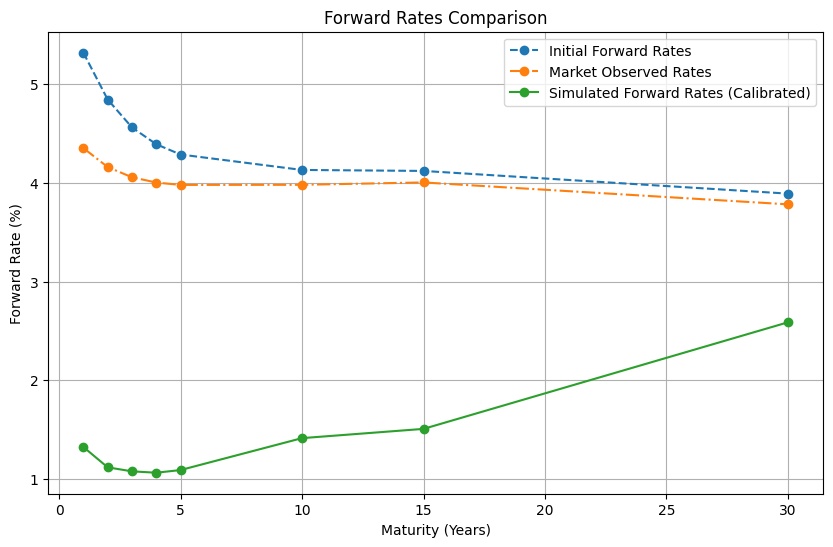

In [44]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Model parameters
n_steps = 100
dt = 1 / 252
initial_forward_rates = np.array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924]) / 100  # in decimal
maturity = [1, 2, 3, 4, 5, 10, 15, 30]  # Maturities in years

# Volatility and correlation matrices
volatility = df_ir_atm_vol_curve.iloc[:, 1:].to_numpy() / 100  # Ensure the volatility is in decimal
correlation_matrix_pd_df = np.array(correlation_matrix_pd_df)

# Market observed forward rates
market_forward_rates = df_us_dollar_swaps.iloc[:, 1].to_numpy() / 100  # in decimal

def calculate_drift(forward_rates, volatility, correlation_matrix, dt):
    n_rates = len(forward_rates)
    drift = np.zeros(n_rates)
    for i in range(n_rates):
        sum_term = 0
        for j in range(i + 1, n_rates):
            sum_term += (volatility[j, j] * correlation_matrix[i, j] * dt) / (1 + dt * forward_rates[j])
        drift[i] = -volatility[i, i] * sum_term
    return drift

# Calculate the drift term
drift_terms = calculate_drift(initial_forward_rates, volatility, correlation_matrix_pd_df, dt)

def simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps):
    n_rates = len(initial_forward_rates)
    forward_rates = np.zeros((n_steps, n_rates))
    forward_rates[0] = initial_forward_rates
    L = np.linalg.cholesky(correlation_matrix)

    for t in range(1, n_steps):
        Z = np.random.normal(size=n_rates)
        dW = L @ Z * np.sqrt(dt)
        for i in range(n_rates):
            drift = drift_terms[i]
            diffusion = volatility[i, i] * dW[i]
            forward_rates[t, i] = forward_rates[t - 1, i] * np.exp(drift * dt + diffusion)
    return forward_rates

def cost_function(params, initial_forward_rates, correlation_matrix, dt, n_steps, market_forward_rates):
    volatility = params.reshape(correlation_matrix.shape)
    simulated_forward_rates = simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps)
    predicted_forward_rates = simulated_forward_rates[-1]
    cost = np.sum((predicted_forward_rates - market_forward_rates) ** 2)
    return cost

initial_volatility_flat = volatility.flatten()
result = minimize(
    cost_function, 
    initial_volatility_flat, 
    args=(initial_forward_rates, correlation_matrix_pd_df, dt, n_steps, market_forward_rates), 
    method='L-BFGS-B'
)
calibrated_volatility = result.x.reshape(volatility.shape)
simulated_forward_rates_calibrated = simulate_forward_rates(initial_forward_rates, calibrated_volatility, correlation_matrix_pd_df, dt, n_steps)

# Plot the forward rates
def plot_forward_rates(maturities, initial_rates, market_rates, simulated_rates):
    plt.figure(figsize=(10, 6))
    
    plt.plot(maturities, initial_rates, marker='o', label='Initial Forward Rates', linestyle='--')
    plt.plot(maturities, market_rates, marker='o', label='Market Observed Rates', linestyle='-.')
    plt.plot(maturities, simulated_rates, marker='o', label='Simulated Forward Rates (Calibrated)')
    
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Forward Rate (%)')
    plt.title('Forward Rates Comparison')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Initial forward rates (in percentage)
initial_forward_rates_pct = initial_forward_rates * 100

# Market observed forward rates (in percentage)
market_forward_rates_pct = market_forward_rates * 100

# Simulated forward rates after calibration (last row, in percentage)
simulated_forward_rates_calibrated_pct = simulated_forward_rates_calibrated[-1] * 100

# Plot the forward rates
plot_forward_rates(maturity, initial_forward_rates_pct, market_forward_rates_pct, simulated_forward_rates_calibrated_pct)


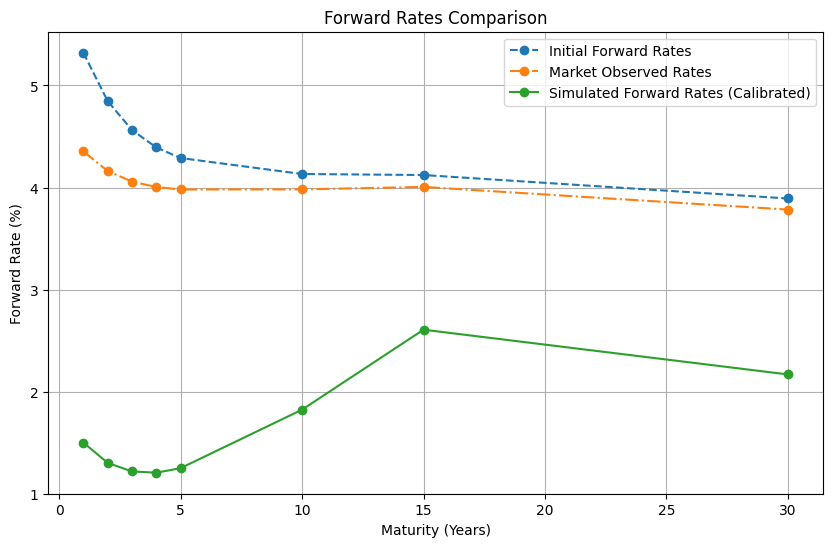

In [45]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Model parameters
n_steps = 100
dt = 1 / 252
initial_forward_rates = np.array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924]) / 100  # in decimal
maturity = [1, 2, 3, 4, 5, 10, 15, 30]  # Maturities in years

# Volatility and correlation matrices
volatility = df_ir_atm_vol_curve.iloc[:, 1:].to_numpy() / 100  # Ensure the volatility is in decimal
correlation_matrix_pd_df = np.array(correlation_matrix_pd_df)

# Market observed forward rates
market_forward_rates = df_us_dollar_swaps.iloc[:, 1].to_numpy() / 100  # in decimal

def calculate_drift(forward_rates, volatility, correlation_matrix, dt):
    n_rates = len(forward_rates)
    drift = np.zeros(n_rates)
    for i in range(n_rates):
        sum_term = 0
        for j in range(i + 1, n_rates):
            sum_term += (volatility[j, j] * correlation_matrix[i, j] * dt) / (1 + dt * forward_rates[j])
        drift[i] = -volatility[i, i] * sum_term
    return drift

# Calculate the drift term
drift_terms = calculate_drift(initial_forward_rates, volatility, correlation_matrix_pd_df, dt)

def simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, drift_terms):
    n_rates = len(initial_forward_rates)
    forward_rates = np.zeros((n_steps, n_rates))
    forward_rates[0] = initial_forward_rates
    L = np.linalg.cholesky(correlation_matrix)

    for t in range(1, n_steps):
        Z = np.random.normal(size=n_rates)
        dW = L @ Z * np.sqrt(dt)
        for i in range(n_rates):
            drift = drift_terms[i]
            diffusion = volatility[i, i] * dW[i]
            forward_rates[t, i] = forward_rates[t - 1, i] * np.exp(drift * dt + diffusion)
    return forward_rates

def cost_function(params, initial_forward_rates, correlation_matrix, dt, n_steps, market_forward_rates):
    volatility = params.reshape(correlation_matrix.shape)
    drift_terms = -calculate_drift(initial_forward_rates, volatility, correlation_matrix, dt)
    simulated_forward_rates = simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, drift_terms)
    predicted_forward_rates = simulated_forward_rates[-1]
    
    # Weighted sum of squared differences
    weights = np.linspace(1, 2, len(market_forward_rates))  # Example weights: can be adjusted
    cost = np.sum(weights * (predicted_forward_rates - market_forward_rates) ** 2)
    
    return cost

initial_volatility_flat = volatility.flatten()
bounds = [(0, 0.99)] * len(initial_volatility_flat)  # Example bounds: can be adjusted
result = minimize(
    cost_function, 
    initial_volatility_flat, 
    args=(initial_forward_rates, correlation_matrix_pd_df, dt, n_steps, market_forward_rates), 
    method='L-BFGS-B',
    bounds=bounds,
    options={'maxiter': 1000}
)

calibrated_volatility = result.x.reshape(volatility.shape)
drift_terms_calibrated = calculate_drift(initial_forward_rates, calibrated_volatility, correlation_matrix_pd_df, dt)
simulated_forward_rates_calibrated = simulate_forward_rates(initial_forward_rates, calibrated_volatility, correlation_matrix_pd_df, dt, n_steps, drift_terms_calibrated)

# Plot the forward rates
def plot_forward_rates(maturities, initial_rates, market_rates, simulated_rates):
    plt.figure(figsize=(10, 6))
    
    plt.plot(maturities, initial_rates, marker='o', label='Initial Forward Rates', linestyle='--')
    plt.plot(maturities, market_rates, marker='o', label='Market Observed Rates', linestyle='-.')
    plt.plot(maturities, simulated_rates, marker='o', label='Simulated Forward Rates (Calibrated)')
    
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Forward Rate (%)')
    plt.title('Forward Rates Comparison')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Initial forward rates (in percentage)
initial_forward_rates_pct = initial_forward_rates * 100

# Market observed forward rates (in percentage)
market_forward_rates_pct = market_forward_rates * 100

# Simulated forward rates after calibration (last row, in percentage)
simulated_forward_rates_calibrated_pct = simulated_forward_rates_calibrated[-1] * 100

# Plot the forward rates
plot_forward_rates(maturity, initial_forward_rates_pct, market_forward_rates_pct, simulated_forward_rates_calibrated_pct)


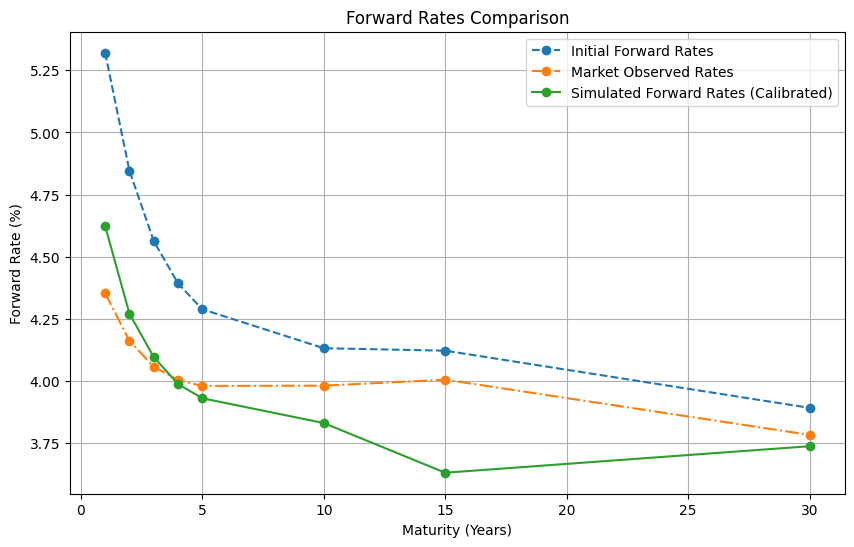

In [46]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Model parameters
n_steps = 100
dt = 1 / 252
n_simulations = 10  # Number of Monte Carlo paths
initial_forward_rates = np.array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924]) / 100  # in decimal
maturity = [1, 2, 3, 4, 5, 10, 15, 30]  # Maturities in years

# Volatility and correlation matrices
volatility = df_ir_atm_vol_curve.iloc[:, 1:].to_numpy() / 100  # Ensure the volatility is in decimal
correlation_matrix_pd_df = np.array(correlation_matrix_pd_df)

# Market observed forward rates
market_forward_rates = df_us_dollar_swaps.iloc[:, 1].to_numpy() / 100  # in decimal

def calculate_drift(forward_rates, volatility, correlation_matrix, dt):
    n_rates = len(forward_rates)
    drift = np.zeros(n_rates)
    for i in range(n_rates):
        sum_term = 0
        for j in range(i + 1, n_rates):
            sum_term += (volatility[j, j] * correlation_matrix[i, j] * dt) / (1 + dt * forward_rates[j])
        drift[i] = -volatility[i, i] * sum_term
    return drift

# Calculate the drift term
drift_terms = calculate_drift(initial_forward_rates, volatility, correlation_matrix_pd_df, dt)

def simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations):
    n_rates = len(initial_forward_rates)
    forward_rates = np.zeros((n_simulations, n_steps, n_rates))
    L = np.linalg.cholesky(correlation_matrix)

    for sim in range(n_simulations):
        forward_rates[sim, 0] = initial_forward_rates
        for t in range(1, n_steps):
            Z = np.random.normal(size=n_rates)
            dW = L @ Z * np.sqrt(dt)
            for i in range(n_rates):
                drift = drift_terms[i]
                diffusion = volatility[i, i] * dW[i]
                forward_rates[sim, t, i] = forward_rates[sim, t - 1, i] * np.exp(drift * dt + diffusion)
    
    # Average over simulations
    average_forward_rates = np.mean(forward_rates, axis=0)
    return average_forward_rates

def cost_function(params, initial_forward_rates, correlation_matrix, dt, n_steps, n_simulations, market_forward_rates):
    volatility = params.reshape(correlation_matrix.shape)
    drift_terms = calculate_drift(initial_forward_rates, volatility, correlation_matrix, dt)
    simulated_forward_rates = simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations)
    predicted_forward_rates = simulated_forward_rates[-1]
    
    # Weighted sum of squared differences
    weights = np.linspace(1, 2, len(market_forward_rates))  # Example weights: can be adjusted
    cost = np.sum(weights * (predicted_forward_rates - market_forward_rates) ** 2)
    
    return cost

initial_volatility_flat = volatility.flatten()
bounds = [(0, 0.5)] * len(initial_volatility_flat)  # Example bounds: can be adjusted
result = minimize(
    cost_function, 
    initial_volatility_flat, 
    args=(initial_forward_rates, correlation_matrix_pd_df, dt, n_steps, n_simulations, market_forward_rates), 
    method='L-BFGS-B',
    bounds=bounds,
    options={'maxiter': 1000}
)

calibrated_volatility = result.x.reshape(volatility.shape)
drift_terms_calibrated = calculate_drift(initial_forward_rates, calibrated_volatility, correlation_matrix_pd_df, dt)
simulated_forward_rates_calibrated = simulate_forward_rates(initial_forward_rates, calibrated_volatility, correlation_matrix_pd_df, dt, n_steps, n_simulations)

# Plot the forward rates
def plot_forward_rates(maturities, initial_rates, market_rates, simulated_rates):
    plt.figure(figsize=(10, 6))
    
    plt.plot(maturities, initial_rates, marker='o', label='Initial Forward Rates', linestyle='--')
    plt.plot(maturities, market_rates, marker='o', label='Market Observed Rates', linestyle='-.')
    plt.plot(maturities, simulated_rates, marker='o', label='Simulated Forward Rates (Calibrated)')
    
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Forward Rate (%)')
    plt.title('Forward Rates Comparison')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Initial forward rates (in percentage)
initial_forward_rates_pct = initial_forward_rates * 100

# Market observed forward rates (in percentage)
market_forward_rates_pct = market_forward_rates * 100

# Simulated forward rates after calibration (last row, in percentage)
simulated_forward_rates_calibrated_pct = simulated_forward_rates_calibrated[-1] * 100

# Plot the forward rates
plot_forward_rates(maturity, initial_forward_rates_pct, market_forward_rates_pct, simulated_forward_rates_calibrated_pct)


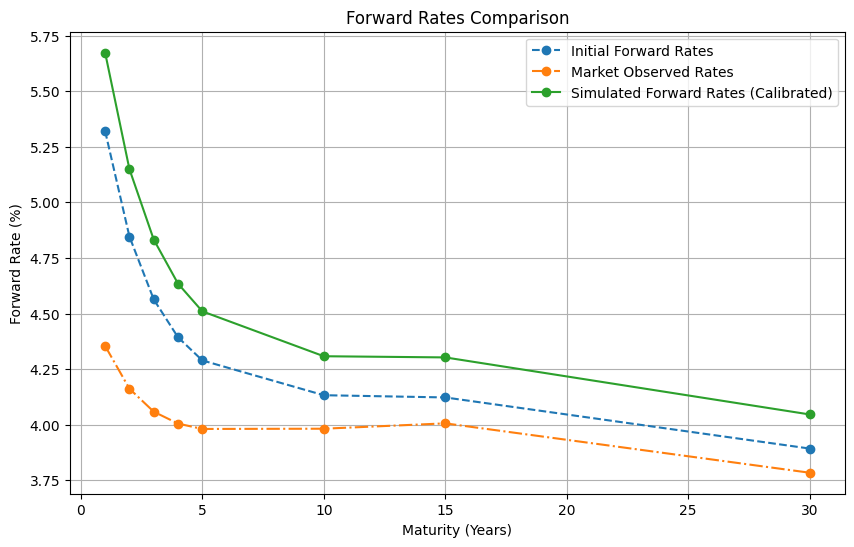

In [47]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Model parameters
n_steps = 100
dt = 1 / 252
n_simulations = 100  # Number of Monte Carlo paths
initial_forward_rates = np.array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924]) / 100  # in decimal
maturity = [1, 2, 3, 4, 5, 10, 15, 30]  # Maturities in years

# Volatility and correlation matrices
volatility = df_ir_atm_vol_curve.iloc[:, 1:].to_numpy() / 100  # Ensure the volatility is in decimal
correlation_matrix_pd_df = np.array(correlation_matrix_pd_df)

# Market observed forward rates
market_forward_rates = df_us_dollar_swaps.iloc[:, 1].to_numpy() / 100  # in decimal

def calculate_drift(forward_rates, volatility, correlation_matrix, dt):
    n_rates = len(forward_rates)
    drift = np.zeros(n_rates)
    for i in range(n_rates):
        sum_term = 0
        for j in range(i + 1, n_rates):
            sum_term += (volatility[j, j] * correlation_matrix[i, j] * dt) / (1 + dt * forward_rates[j])
        drift[i] = -volatility[i, i] * sum_term
    return drift

# Calculate the drift term
drift_terms = calculate_drift(initial_forward_rates, volatility, correlation_matrix_pd_df, dt)

def simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations):
    n_rates = len(initial_forward_rates)
    forward_rates = np.zeros((n_simulations, n_steps, n_rates))
    L = np.linalg.cholesky(correlation_matrix)

    for sim in range(n_simulations):
        forward_rates[sim, 0] = initial_forward_rates
        for t in range(1, n_steps):
            Z = np.random.normal(size=n_rates)
            dW = L @ Z * np.sqrt(dt)
            for i in range(n_rates):
                drift = -drift_terms[i]
                diffusion = volatility[i, i] * dW[i]
                forward_rates[sim, t, i] = forward_rates[sim, t - 1, i] * np.exp(drift * dt + diffusion)
    
    # Average over simulations
    average_forward_rates = np.mean(forward_rates, axis=0)
    return average_forward_rates

def cost_function(params, initial_forward_rates, correlation_matrix, dt, n_steps, n_simulations, market_forward_rates):
    volatility = params.reshape(correlation_matrix.shape)
    drift_terms = -calculate_drift(initial_forward_rates, volatility, correlation_matrix, dt)
    simulated_forward_rates = simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations)
    predicted_forward_rates = simulated_forward_rates[-1]
    
    # Weighted sum of squared differences
    weights = np.linspace(1, 2, len(market_forward_rates))  # Example weights: can be adjusted
    cost = np.sum(weights * (predicted_forward_rates - market_forward_rates) ** 2)
    
    return cost

initial_volatility_flat = volatility.flatten()
bounds = [(0, 0.5)] * len(initial_volatility_flat)  # Example bounds: can be adjusted
result = minimize(
    cost_function, 
    initial_volatility_flat, 
    args=(initial_forward_rates, correlation_matrix_pd_df, dt, n_steps, n_simulations, market_forward_rates), 
    method='L-BFGS-B',
    bounds=bounds,
    options={'maxiter': 1000}
)

calibrated_volatility = result.x.reshape(volatility.shape)
drift_terms_calibrated = -calculate_drift(initial_forward_rates, calibrated_volatility, correlation_matrix_pd_df, dt)
simulated_forward_rates_calibrated = simulate_forward_rates(initial_forward_rates, calibrated_volatility, correlation_matrix_pd_df, dt, n_steps, n_simulations)

# Plot the forward rates
def plot_forward_rates(maturities, initial_rates, market_rates, simulated_rates):
    plt.figure(figsize=(10, 6))
    
    plt.plot(maturities, initial_rates, marker='o', label='Initial Forward Rates', linestyle='--')
    plt.plot(maturities, market_rates, marker='o', label='Market Observed Rates', linestyle='-.')
    plt.plot(maturities, simulated_rates, marker='o', label='Simulated Forward Rates (Calibrated)')
    
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Forward Rate (%)')
    plt.title('Forward Rates Comparison')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Initial forward rates (in percentage)
initial_forward_rates_pct = initial_forward_rates * 100

# Market observed forward rates (in percentage)
market_forward_rates_pct = market_forward_rates * 100

# Simulated forward rates after calibration (last row, in percentage)
simulated_forward_rates_calibrated_pct = simulated_forward_rates_calibrated[-1] * 100

# Plot the forward rates
plot_forward_rates(maturity, initial_forward_rates_pct, market_forward_rates_pct, simulated_forward_rates_calibrated_pct)


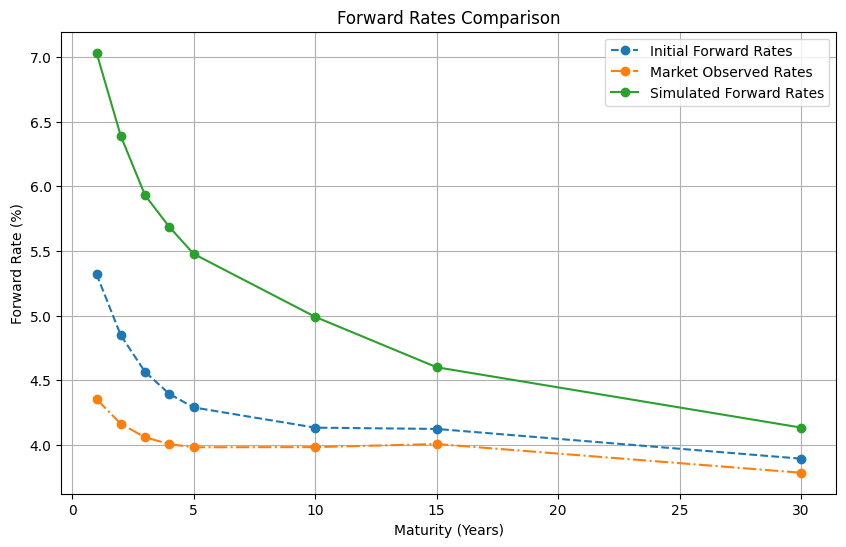

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model parameters
n_steps = 100
dt = 1 / 252
n_simulations = 100  # Number of Monte Carlo paths
initial_forward_rates = np.array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924]) / 100  # in decimal
maturity = [1, 2, 3, 4, 5, 10, 15, 30]  # Maturities in years

# Volatility and correlation matrices
volatility = df_ir_atm_vol_curve.iloc[:, 1:].to_numpy() / 100  # Ensure the volatility is in decimal
correlation_matrix_pd_df = np.array(correlation_matrix_pd_df)

# Market observed forward rates
market_forward_rates = df_us_dollar_swaps.iloc[:, 1].to_numpy() / 100  # in decimal

def calculate_drift(forward_rates, volatility, correlation_matrix, dt):
    n_rates = len(forward_rates)
    drift = np.zeros(n_rates)
    for i in range(n_rates):
        sum_term = 0
        for j in range(i + 1, n_rates):
            sum_term += (volatility[j, j] * correlation_matrix[i, j] * dt) / (1 + dt * forward_rates[j])
        drift[i] = -volatility[i, i] * sum_term
    return drift

# Calculate the drift term
drift_terms = calculate_drift(initial_forward_rates, volatility, correlation_matrix_pd_df, dt)

def simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations):
    n_rates = len(initial_forward_rates)
    forward_rates = np.zeros((n_simulations, n_steps, n_rates))
    L = np.linalg.cholesky(correlation_matrix)

    for sim in range(n_simulations):
        forward_rates[sim, 0] = initial_forward_rates
        for t in range(1, n_steps):
            Z = np.random.normal(size=n_rates)
            dW = L @ Z * np.sqrt(dt)
            for i in range(n_rates):
                drift = drift_terms[i]
                diffusion = volatility[i, i] * dW[i]
                forward_rates[sim, t, i] = forward_rates[sim, t - 1, i] * np.exp(drift * dt + diffusion)
    
    # Average over simulations
    average_forward_rates = np.mean(forward_rates, axis=0)
    return average_forward_rates

# Simulate forward rates using the determined drift terms and given volatility
simulated_forward_rates = simulate_forward_rates(initial_forward_rates, volatility, correlation_matrix_pd_df, dt, n_steps, n_simulations)

# Plot the forward rates
def plot_forward_rates(maturities, initial_rates, market_rates, simulated_rates):
    plt.figure(figsize=(10, 6))
    
    plt.plot(maturities, initial_rates, marker='o', label='Initial Forward Rates', linestyle='--')
    plt.plot(maturities, market_rates, marker='o', label='Market Observed Rates', linestyle='-.')
    plt.plot(maturities, simulated_rates, marker='o', label='Simulated Forward Rates')
    
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Forward Rate (%)')
    plt.title('Forward Rates Comparison')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Initial forward rates (in percentage)
initial_forward_rates_pct = initial_forward_rates * 100

# Market observed forward rates (in percentage)
market_forward_rates_pct = market_forward_rates * 100

# Simulated forward rates (last row, in percentage)
simulated_forward_rates_pct = simulated_forward_rates[-1] * 100

# Plot the forward rates
plot_forward_rates(maturity, initial_forward_rates_pct, market_forward_rates_pct, simulated_forward_rates_pct)


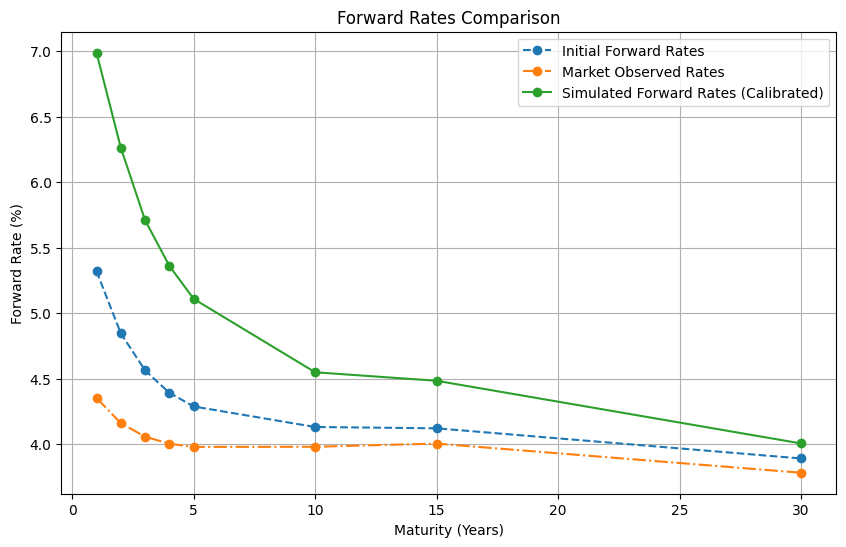

In [49]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Model parameters
n_steps = 100
dt = 1 / 252
n_simulations = 100  # Number of Monte Carlo paths
initial_forward_rates = np.array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924]) / 100  # in decimal
maturity = [1, 2, 3, 4, 5, 10, 15, 30]  # Maturities in years

# Volatility and correlation matrices
volatility = df_ir_atm_vol_curve.iloc[:, 1:].to_numpy() / 100  # Ensure the volatility is in decimal
correlation_matrix_pd_df = np.array(correlation_matrix_pd_df)

# Market observed forward rates
market_forward_rates = df_us_dollar_swaps.iloc[:, 1].to_numpy() / 100  # in decimal

def simulate_forward_rates_with_drift(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations, drift_terms):
    n_rates = len(initial_forward_rates)
    forward_rates = np.zeros((n_simulations, n_steps, n_rates))
    L = np.linalg.cholesky(correlation_matrix)

    for sim in range(n_simulations):
        forward_rates[sim, 0] = initial_forward_rates
        for t in range(1, n_steps):
            Z = np.random.normal(size=n_rates)
            dW = L @ Z * np.sqrt(dt)
            for i in range(n_rates):
                drift = drift_terms[i]
                diffusion = volatility[i, i] * dW[i]
                forward_rates[sim, t, i] = forward_rates[sim, t - 1, i] * np.exp(drift * dt + diffusion)
    
    # Average over simulations
    average_forward_rates = np.mean(forward_rates, axis=0)
    return average_forward_rates

def cost_function_drift(drift_terms, initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations, market_forward_rates):
    simulated_forward_rates = simulate_forward_rates_with_drift(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations, drift_terms)
    predicted_forward_rates = simulated_forward_rates[-1]
    
    # Weighted sum of squared differences
    weights = np.linspace(1, 2, len(market_forward_rates))  # Example weights: can be adjusted
    cost = np.sum(weights * (predicted_forward_rates - market_forward_rates) ** 2)
    
    return cost

initial_drift_terms = np.zeros_like(initial_forward_rates)
result = minimize(
    cost_function_drift, 
    initial_drift_terms, 
    args=(initial_forward_rates, volatility, correlation_matrix_pd_df, dt, n_steps, n_simulations, market_forward_rates), 
    method='L-BFGS-B',
    options={'maxiter': 1000}
)

calibrated_drift_terms = result.x
simulated_forward_rates_calibrated = simulate_forward_rates_with_drift(initial_forward_rates, volatility, correlation_matrix_pd_df, dt, n_steps, n_simulations, calibrated_drift_terms)

# Plot the forward rates
def plot_forward_rates(maturities, initial_rates, market_rates, simulated_rates):
    plt.figure(figsize=(10, 6))
    
    plt.plot(maturities, initial_rates, marker='o', label='Initial Forward Rates', linestyle='--')
    plt.plot(maturities, market_rates, marker='o', label='Market Observed Rates', linestyle='-.')
    plt.plot(maturities, simulated_rates, marker='o', label='Simulated Forward Rates (Calibrated)')
    
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Forward Rate (%)')
    plt.title('Forward Rates Comparison')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Initial forward rates (in percentage)
initial_forward_rates_pct = initial_forward_rates * 100

# Market observed forward rates (in percentage)
market_forward_rates_pct = market_forward_rates * 100

# Simulated forward rates after calibration (last row, in percentage)
simulated_forward_rates_calibrated_pct = simulated_forward_rates_calibrated[-1] * 100

# Plot the forward rates
plot_forward_rates(maturity, initial_forward_rates_pct, market_forward_rates_pct, simulated_forward_rates_calibrated_pct)


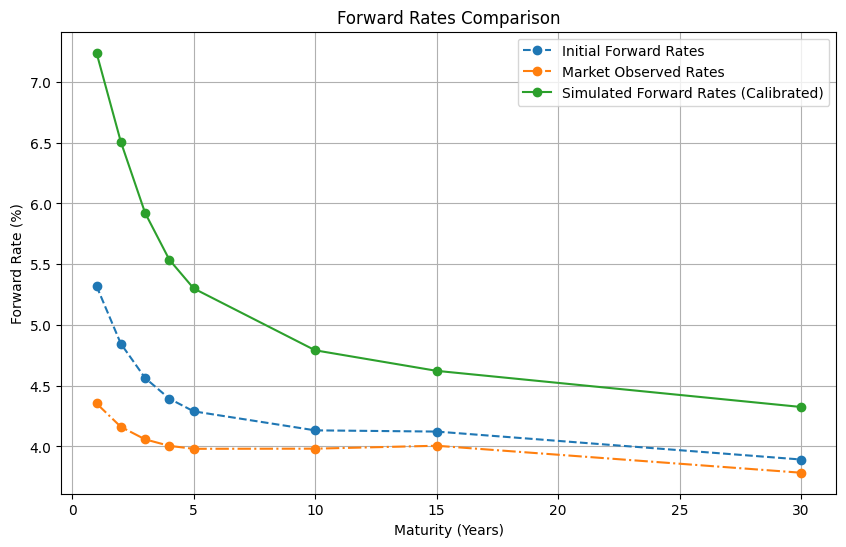

In [50]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Model parameters
n_steps = 100
dt = 1 / 252
n_simulations = 100  # Number of Monte Carlo paths
initial_forward_rates = np.array([5.3207, 4.8463, 4.5636, 4.3929, 4.2889, 4.1324, 4.1224, 3.8924]) / 100  # in decimal
maturity = [1, 2, 3, 4, 5, 10, 15, 30]  # Maturities in years

# Volatility and correlation matrices
volatility = df_ir_atm_vol_curve.iloc[:, 1:].to_numpy() / 100  # Ensure the volatility is in decimal
correlation_matrix_pd_df = np.array(correlation_matrix_pd_df)

# Market observed forward rates
market_forward_rates = df_us_dollar_swaps.iloc[:, 1].to_numpy() / 100  # in decimal

def calculate_drift(forward_rates, volatility, correlation_matrix, dt):
    n_rates = len(forward_rates)
    drift = np.zeros(n_rates)
    for i in range(n_rates):
        sum_term = 0
        for j in range(i + 1, n_rates):
            sum_term += (volatility[j, j] * correlation_matrix[i, j] * dt) / (1 + dt * forward_rates[j])
        drift[i] = -volatility[i, i] * sum_term
    return drift

def simulate_forward_rates_with_drift(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations, drift_terms):
    n_rates = len(initial_forward_rates)
    forward_rates = np.zeros((n_simulations, n_steps, n_rates))
    L = np.linalg.cholesky(correlation_matrix)

    for sim in range(n_simulations):
        forward_rates[sim, 0] = initial_forward_rates
        for t in range(1, n_steps):
            Z = np.random.normal(size=n_rates)
            dW = L @ Z * np.sqrt(dt)
            for i in range(n_rates):
                drift = drift_terms[i]
                diffusion = volatility[i, i] * dW[i]
                forward_rates[sim, t, i] = forward_rates[sim, t - 1, i] * np.exp(drift * dt + diffusion)
    
    # Average over simulations
    average_forward_rates = np.mean(forward_rates, axis=0)
    return average_forward_rates

def cost_function_drift(drift_terms, initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations, market_forward_rates):
    simulated_forward_rates = simulate_forward_rates_with_drift(initial_forward_rates, volatility, correlation_matrix, dt, n_steps, n_simulations, drift_terms)
    predicted_forward_rates = simulated_forward_rates[-1]
    
    # Weighted sum of squared differences
    weights = np.linspace(1, 2, len(market_forward_rates))  # Example weights: can be adjusted
    cost = np.sum(weights * (predicted_forward_rates - market_forward_rates) ** 2)
    
    return cost

initial_drift_terms = np.zeros_like(initial_forward_rates)
result = minimize(
    cost_function_drift, 
    initial_drift_terms, 
    args=(initial_forward_rates, volatility, correlation_matrix_pd_df, dt, n_steps, n_simulations, market_forward_rates), 
    method='L-BFGS-B',
    options={'maxiter': 1000}
)

calibrated_drift_terms = result.x
simulated_forward_rates_calibrated = simulate_forward_rates_with_drift(initial_forward_rates, volatility, correlation_matrix_pd_df, dt, n_steps, n_simulations, calibrated_drift_terms)

# Plot the forward rates
def plot_forward_rates(maturities, initial_rates, market_rates, simulated_rates):
    plt.figure(figsize=(10, 6))
    
    plt.plot(maturities, initial_rates, marker='o', label='Initial Forward Rates', linestyle='--')
    plt.plot(maturities, market_rates, marker='o', label='Market Observed Rates', linestyle='-.')
    plt.plot(maturities, simulated_rates, marker='o', label='Simulated Forward Rates (Calibrated)')
    
    plt.xlabel('Maturity (Years)')
    plt.ylabel('Forward Rate (%)')
    plt.title('Forward Rates Comparison')
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Initial forward rates (in percentage)
initial_forward_rates_pct = initial_forward_rates * 100

# Market observed forward rates (in percentage)
market_forward_rates_pct = market_forward_rates * 100

# Simulated forward rates after calibration (last row, in percentage)
simulated_forward_rates_calibrated_pct = simulated_forward_rates_calibrated[-1] * 100

# Plot the forward rates
plot_forward_rates(maturity, initial_forward_rates_pct, market_forward_rates_pct, simulated_forward_rates_calibrated_pct)


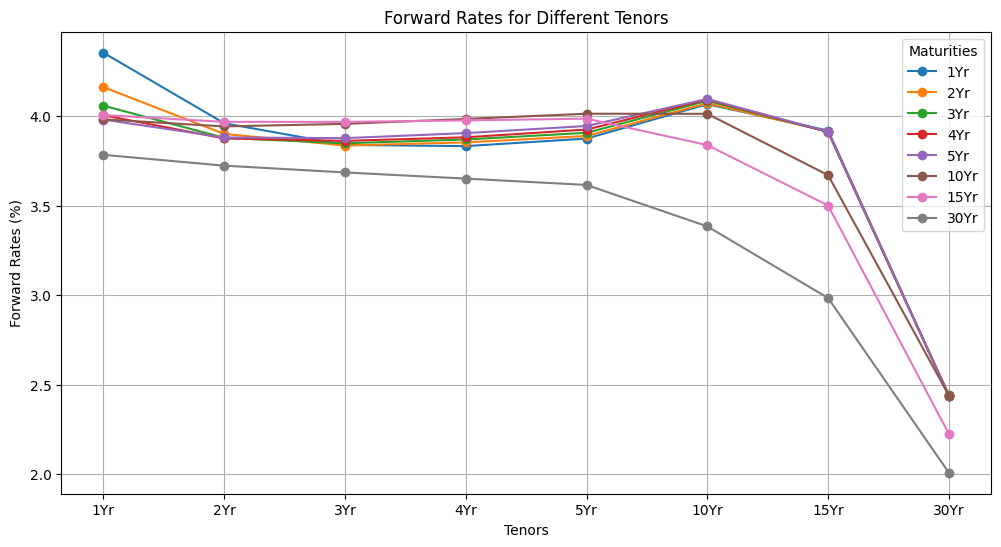

,1Yr,2Yr,3Yr,4Yr,5Yr,10Yr,15Yr,30Yr
1Yr,4.3540,4.1617,4.0583,4.0048,3.9806,3.9817,4.0058,3.7837
2Yr,3.9602,3.9006,3.8787,3.8752,3.8807,3.9424,3.9679,3.7232
3Yr,3.8389,3.8358,3.8482,3.8615,3.8768,3.9567,3.9677,3.6853
4Yr,3.8324,3.8531,3.8695,3.8817,3.9050,3.9841,3.9760,3.6510
5Yr,3.8745,3.8890,3.9067,3.9249,3.9448,4.0133,3.9858,3.6155
10Yr,4.0666,4.0721,4.0854,4.0920,4.0959,4.0128,3.8382,3.3840
15Yr,3.9192,3.9139,3.9122,3.9113,3.9128,3.6703,3.5006,2.9840
30Yr,2.4386,2.4419,2.4408,2.4387,2.4387,2.4388,2.2251,2.0082


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the forward rates for each tenor read horizontally
data = {
    '1Yr': [4.354, 3.9602, 3.8389, 3.8324, 3.8745, 4.0666, 3.9192, 2.4386],
    '2Yr': [4.1617, 3.9006, 3.8358, 3.8531, 3.889, 4.0721, 3.9139, 2.4419],
    '3Yr': [4.0583, 3.8787, 3.8482, 3.8695, 3.9067, 4.0854, 3.9122, 2.4408],
    '4Yr': [4.0048, 3.8752, 3.8615, 3.8817, 3.9249, 4.092, 3.9113, 2.4387],
    '5Yr': [3.9806, 3.8807, 3.8768, 3.905, 3.9448, 4.0959, 3.9128, 2.4387],
    '10Yr': [3.9817, 3.9424, 3.9567, 3.9841, 4.0133, 4.0128, 3.6703, 2.4388],
    '15Yr': [4.0058, 3.9679, 3.9677, 3.976, 3.9858, 3.8382, 3.5006, 2.2251],
    '30Yr': [3.7837, 3.7232, 3.6853, 3.651, 3.6155, 3.384, 2.984, 2.0082]
}

tenors = ['1Yr', '2Yr', '3Yr', '4Yr', '5Yr', '10Yr', '15Yr', '30Yr']

df = pd.DataFrame(data, index=tenors)

# Plot the forward rates
plt.figure(figsize=(12, 6))
for tenor in df.columns:
    plt.plot(df.index, df[tenor], marker='o', label=tenor)
plt.title('Forward Rates for Different Tenors')
plt.xlabel('Tenors')
plt.ylabel('Forward Rates (%)')
plt.legend(title='Maturities')
plt.grid(True)
plt.show()

df


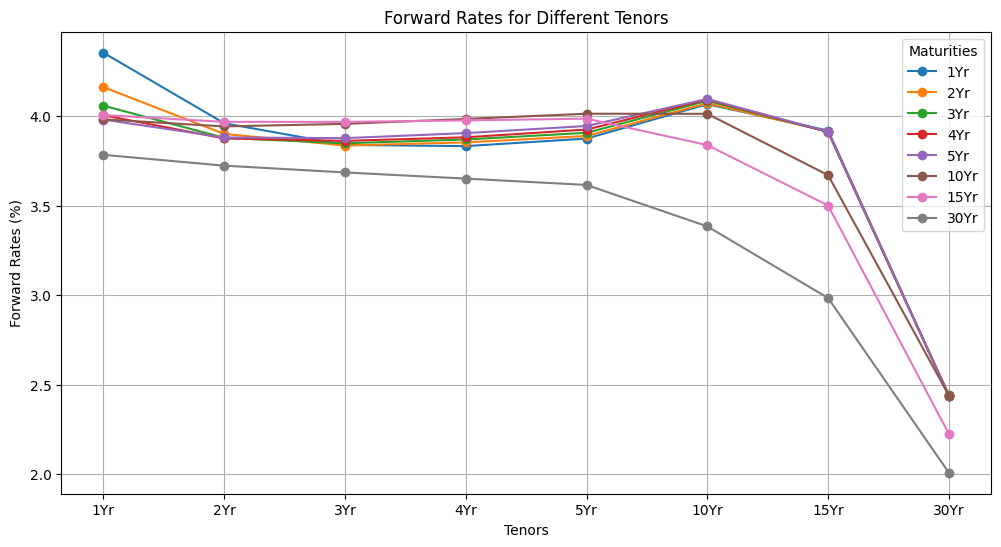

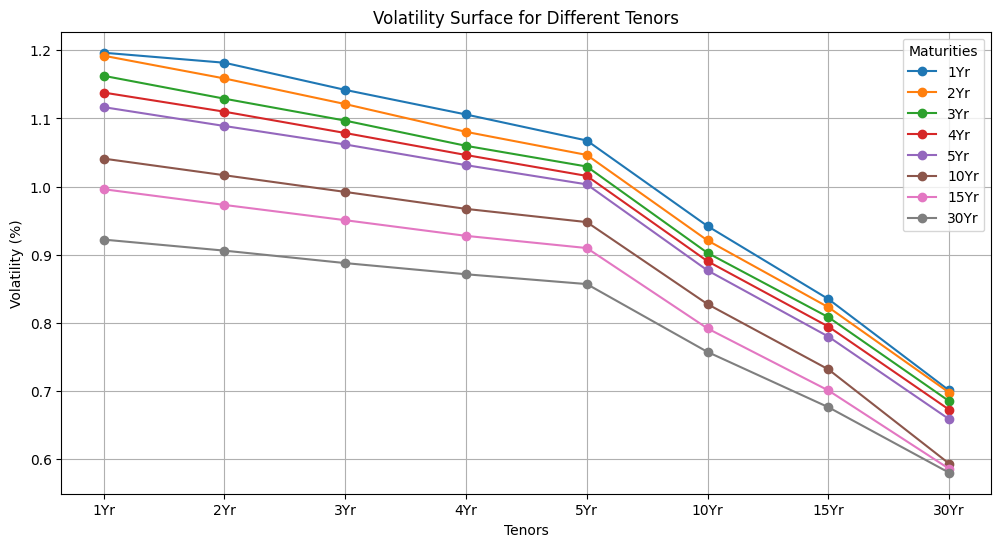

(         1Yr     2Yr     3Yr     4Yr     5Yr    10Yr    15Yr    30Yr
 1Yr   4.3540  4.1617  4.0583  4.0048  3.9806  3.9817  4.0058  3.7837
 2Yr   3.9602  3.9006  3.8787  3.8752  3.8807  3.9424  3.9679  3.7232
 3Yr   3.8389  3.8358  3.8482  3.8615  3.8768  3.9567  3.9677  3.6853
 4Yr   3.8324  3.8531  3.8695  3.8817  3.9050  3.9841  3.9760  3.6510
 5Yr   3.8745  3.8890  3.9067  3.9249  3.9448  4.0133  3.9858  3.6155
 10Yr  4.0666  4.0721  4.0854  4.0920  4.0959  4.0128  3.8382  3.3840
 15Yr  3.9192  3.9139  3.9122  3.9113  3.9128  3.6703  3.5006  2.9840
 30Yr  2.4386  2.4419  2.4408  2.4387  2.4387  2.4388  2.2251  2.0082,
          1Yr     2Yr     3Yr     4Yr     5Yr    10Yr    15Yr    30Yr
 1Yr   1.1965  1.1921  1.1626  1.1380  1.1166  1.0410  0.9961  0.9221
 2Yr   1.1818  1.1587  1.1290  1.1099  1.0889  1.0166  0.9730  0.9059
 3Yr   1.1419  1.1211  1.0968  1.0786  1.0618  0.9921  0.9506  0.8876
 4Yr   1.1058  1.0803  1.0598  1.0463  1.0314  0.9672  0.9276  0.8712
 5Yr   1.0676  1.04

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the forward rates for each tenor read horizontally
forward_rates_data = {
    '1Yr': [4.354, 3.9602, 3.8389, 3.8324, 3.8745, 4.0666, 3.9192, 2.4386],
    '2Yr': [4.1617, 3.9006, 3.8358, 3.8531, 3.889, 4.0721, 3.9139, 2.4419],
    '3Yr': [4.0583, 3.8787, 3.8482, 3.8695, 3.9067, 4.0854, 3.9122, 2.4408],
    '4Yr': [4.0048, 3.8752, 3.8615, 3.8817, 3.9249, 4.092, 3.9113, 2.4387],
    '5Yr': [3.9806, 3.8807, 3.8768, 3.905, 3.9448, 4.0959, 3.9128, 2.4387],
    '10Yr': [3.9817, 3.9424, 3.9567, 3.9841, 4.0133, 4.0128, 3.6703, 2.4388],
    '15Yr': [4.0058, 3.9679, 3.9677, 3.976, 3.9858, 3.8382, 3.5006, 2.2251],
    '30Yr': [3.7837, 3.7232, 3.6853, 3.651, 3.6155, 3.384, 2.984, 2.0082]
}

forward_rates_df = pd.DataFrame(forward_rates_data, index=['1Yr', '2Yr', '3Yr', '4Yr', '5Yr', '10Yr', '15Yr', '30Yr'])

# Define the volatility surface read horizontally
vol_surface_data = {
    '1Yr': [119.65, 118.18, 114.19, 110.58, 106.76, 94.19, 83.48, 70.06],
    '2Yr': [119.21, 115.87, 112.11, 108.03, 104.64, 92.08, 82.28, 69.75],
    '3Yr': [116.26, 112.9, 109.68, 105.98, 102.94, 90.25, 80.82, 68.49],
    '4Yr': [113.8, 110.99, 107.86, 104.63, 101.56, 89.03, 79.44, 67.24],
    '5Yr': [111.66, 108.89, 106.18, 103.14, 100.32, 87.68, 77.97, 65.84],
    '10Yr': [104.1, 101.66, 99.21, 96.72, 94.78, 82.73, 73.16, 59.32],
    '15Yr': [99.61, 97.3, 95.06, 92.76, 90.97, 79.16, 70.06, 58.56],
    '30Yr': [92.21, 90.59, 88.76, 87.12, 85.68, 75.71, 67.6, 57.98]
}

vol_surface_df = pd.DataFrame(vol_surface_data, index=['1Yr', '2Yr', '3Yr', '4Yr', '5Yr', '10Yr', '15Yr', '30Yr'])

# Normalize vol surface to percentage
vol_surface_df /= 100

# Define the correlation matrix
correlation_matrix = np.array([
    [1, 0.989631024, 0.961827666, 0.925019189, 0.883057414, 0.708175774, 0.701037988, 0.636869912],
    [0.989631024, 1, 0.989940305, 0.965473539, 0.93208378, 0.770832664, 0.741904402, 0.672833134],
    [0.961827666, 0.989940305, 1, 0.992167066, 0.972137142, 0.840834961, 0.783714285, 0.708048232],
    [0.925019189, 0.965473539, 0.992167066, 1, 0.993626042, 0.897926876, 0.80222771, 0.706528544],
    [0.883057414, 0.93208378, 0.972137142, 0.993626042, 1, 0.940556473, 0.843565858, 0.742117703],
    [0.708175774, 0.770832664, 0.840834961, 0.897926876, 0.940556473, 1, 0.878103763, 0.766536803],
    [0.701037988, 0.741904402, 0.783714285, 0.80222771, 0.843565858, 0.878103763, 1, 0.790955902],
    [0.636869912, 0.672833134, 0.708048232, 0.706528544, 0.742117703, 0.766536803, 0.790955902, 1]
])

# Plot the forward rates
plt.figure(figsize=(12, 6))
for tenor in forward_rates_df.columns:
    plt.plot(forward_rates_df.index, forward_rates_df[tenor], marker='o', label=tenor)
plt.title('Forward Rates for Different Tenors')
plt.xlabel('Tenors')
plt.ylabel('Forward Rates (%)')
plt.legend(title='Maturities')
plt.grid(True)
plt.show()

# Plot the volatility surface
plt.figure(figsize=(12, 6))
for tenor in vol_surface_df.columns:
    plt.plot(vol_surface_df.index, vol_surface_df[tenor], marker='o', label=tenor)
plt.title('Volatility Surface for Different Tenors')
plt.xlabel('Tenors')
plt.ylabel('Volatility (%)')
plt.legend(title='Maturities')
plt.grid(True)
plt.show()

forward_rates_df, vol_surface_df, correlation_matrix


In [53]:
def simulate_forward_rates(initial_rates, vol_surface, shift_parameters, chol, dt, n_steps, n_simulations):
    n_rates = len(initial_rates)
    rates = np.zeros((n_simulations, n_steps, n_rates))
    rates[:, 0, :] = initial_rates
    
    for t in range(1, n_steps):
        Z = np.random.normal(size=(n_simulations, n_rates))
        dW = np.dot(Z, chol.T) * np.sqrt(dt)
        for k in range(n_rates):
            drift = 0  # Set drift to zero for simplicity
            volatility = np.interp(t * dt, np.linspace(1, 30, len(vol_surface)), vol_surface[:, k])
            diffusion = volatility * (rates[:, t-1, k] + shift_parameters[k]) * dW[:, k]
            rates[:, t, k] = rates[:, t-1, k] + drift * dt + diffusion
    
    return rates

def objective_function(params, market_data, simulate_func, *args):
    shift_parameters = params
    simulated_rates = simulate_func(initial_forward_rates, vol_surface, shift_parameters, chol, dt, n_steps, n_simulations)
    simulated_avg = np.mean(simulated_rates[:, -1, :], axis=0)
    error = np.sum((simulated_avg - market_data) ** 2)
    return error

from scipy.optimize import minimize

# Extract market data for calibration
market_data = forward_rates_df.iloc[-1].values / 100  # Use the last row to match simulated_avg

# Initial guess for shift parameters
initial_guess = shift_parameters

# Perform calibration
result = minimize(objective_function, initial_guess, args=(market_data, simulate_forward_rates))
calibrated_shift_parameters = result.x

print("Calibrated Shift Parameters:", calibrated_shift_parameters)

# Predict forward rates using calibrated parameters
predicted_forward_rates = simulate_forward_rates(initial_forward_rates, vol_surface, calibrated_shift_parameters, chol, dt, n_steps, n_simulations)

# Calculate mean and standard deviation of predicted forward rates
# mean_predicted_rates = np.mean(predicted_forward_rates, axis=0)
# std_predicted_rates = np.std(predicted_forward_rates, axis=0)

# Plot mean and standard deviation of predicted forward rates
plt.figure(figsize=(12, 6))
for i in range(len(initial_forward_rates)):
    plt.plot(mean_predicted_rates[:, i], label=f'Maturity {forward_rates_df.index[i]}')
    # plt.fill_between(range(n_steps), mean_predicted_rates[:, i] - std_predicted_rates[:, i], mean_predicted_rates[:, i] + std_predicted_rates[:, i], alpha=0.2)
plt.title('Mean and Standard Deviation of Predicted Forward Rates')
plt.xlabel('Time Steps')
plt.ylabel('Rates')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'shift_parameters' is not defined

In [54]:
def nearest_positive_definite(matrix):
    """Find the nearest positive definite matrix to the input."""
    eigvals, eigvecs = np.linalg.eigh(matrix)
    eigvals[eigvals < 0] = 0  # Set any negative eigenvalues to zero
    positive_definite_matrix = np.dot(eigvecs, np.dot(np.diag(eigvals), eigvecs.T))
    return positive_definite_matrix

def simulate_forward_rates(initial_rates, vol_surface, shift_parameters, chol, dt, n_steps, n_simulations):
    n_rates = len(initial_rates)
    rates = np.zeros((n_simulations, n_steps, n_rates))
    rates[:, 0, :] = initial_rates
    
    for t in range(1, n_steps):
        Z = np.random.normal(size=(n_simulations, n_rates))
        dW = np.dot(Z, chol.T) * np.sqrt(dt)
        for k in range(n_rates):
            drift = 0  # Set drift to zero for simplicity
            volatility = np.interp(t * dt, np.linspace(1, 30, len(vol_surface)), vol_surface[:, k])
            diffusion = volatility * (rates[:, t-1, k] + shift_parameters[k]) * dW[:, k]
            rates[:, t, k] = rates[:, t-1, k] + drift * dt + diffusion
    
    return rates

def objective_function(params, market_data, simulate_func, *args):
    shift_parameters = params
    simulated_rates = simulate_func(initial_forward_rates, vol_surface, shift_parameters, chol, dt, n_steps, n_simulations)
    simulated_avg = np.mean(simulated_rates[:, -1, :], axis=0)
    error = np.sum((simulated_avg - market_data) ** 2)
    return error

from scipy.optimize import minimize

def calibrate_model():
    # Ensure the correlation matrix is positive definite
    positive_definite_correlation_matrix = nearest_positive_definite(correlation_matrix)
    chol = np.linalg.cholesky(positive_definite_correlation_matrix)
    
    # Perform calibration
    initial_guess = shift_parameters
    result = minimize(objective_function, initial_guess, args=(market_data, simulate_forward_rates))
    calibrated_shift_parameters = result.x

    print("Calibrated Shift Parameters:", calibrated_shift_parameters)
    return calibrated_shift_parameters

def predict_forward_rates(calibrated_shift_parameters):
    # Predict forward rates using calibrated parameters
    predicted_forward_rates = simulate_forward_rates(initial_forward_rates, vol_surface, calibrated_shift_parameters, chol, dt, n_steps, n_simulations)

    # Calculate mean and standard deviation of predicted forward rates
    # mean_predicted_rates = np.mean(predicted_forward_rates, axis=0)
    # std_predicted_rates = np.std(predicted_forward_rates, axis=0)

    # Plot mean and standard deviation of predicted forward rates
    plt.figure(figsize=(12, 6))
    for i in range(len(initial_forward_rates)):
        plt.plot(mean_predicted_rates[:, i], label=f'Maturity {forward_rates_df.index[i]}')
        # plt.fill_between(range(n_steps), mean_predicted_rates[:, i] - std_predicted_rates[:, i], mean_predicted_rates[:, i] + std_predicted_rates[:, i], alpha=0.2)
    plt.title('Mean and Standard Deviation of Predicted Forward Rates')
    plt.xlabel('Time Steps')
    plt.ylabel('Rates')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ensure the correlation matrix is positive definite
correlation_matrix = nearest_positive_definite(correlation_matrix)

# Calibration
calibrated_shift_parameters = calibrate_model()

# Prediction
predict_forward_rates(calibrated_shift_parameters)


NameError: name 'shift_parameters' is not defined

In [55]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def nearest_positive_definite(matrix):
    """Find the nearest positive definite matrix to the input."""
    eigvals, eigvecs = np.linalg.eigh(matrix)
    eigvals[eigvals < 0] = 0  # Set any negative eigenvalues to zero
    positive_definite_matrix = np.dot(eigvecs, np.dot(np.diag(eigvals), eigvecs.T))
    return positive_definite_matrix

def simulate_forward_rates(initial_rates, vol_surface, shift_parameters, chol, dt, n_steps, n_simulations):
    n_rates = len(initial_rates)
    rates = np.zeros((n_simulations, n_steps, n_rates))
    rates[:, 0, :] = initial_rates
    
    for t in range(1, n_steps):
        Z = np.random.normal(size=(n_simulations, n_rates))
        dW = np.dot(Z, chol.T) * np.sqrt(dt)
        for k in range(n_rates):
            drift = 0  # Set drift to zero for simplicity
            volatility = np.interp(t * dt, np.linspace(1, 30, len(vol_surface)), vol_surface[:, k])
            diffusion = volatility * (rates[:, t-1, k] + shift_parameters[k]) * dW[:, k]
            rates[:, t, k] = rates[:, t-1, k] + drift * dt + diffusion
    
    return rates

def objective_function(params, market_data, simulate_func, *args):
    shift_parameters = params
    simulated_rates = simulate_func(initial_forward_rates, vol_surface, shift_parameters, chol, dt, n_steps, n_simulations)
    simulated_avg = np.mean(simulated_rates[:, -1, :], axis=0)
    error = np.sum((simulated_avg - market_data) ** 2)
    return error

def calibrate_model():
    # Ensure the correlation matrix is positive definite
    positive_definite_correlation_matrix = nearest_positive_definite(correlation_matrix)
    chol = np.linalg.cholesky(positive_definite_correlation_matrix)
    
    # Perform calibration
    initial_guess = shift_parameters
    result = minimize(objective_function, initial_guess, args=(market_data, simulate_forward_rates))
    calibrated_shift_parameters = result.x

    print("Calibrated Shift Parameters:", calibrated_shift_parameters)
    return calibrated_shift_parameters, chol

def predict_forward_rates(calibrated_shift_parameters, chol):
    # Predict forward rates using calibrated parameters
    predicted_forward_rates = simulate_forward_rates(initial_forward_rates, vol_surface, calibrated_shift_parameters, chol, dt, n_steps, n_simulations)

    # Calculate mean of predicted forward rates
    mean_predicted_rates = np.mean(predicted_forward_rates, axis=0)

    # Plot mean of predicted forward rates with actual forward rates
    plt.figure(figsize=(12, 6))
    for i in range(len(initial_forward_rates)):
        plt.plot(mean_predicted_rates[:, i], label=f'Predicted {forward_rates_df.columns[i]}')
        plt.plot([0, n_steps-1], [forward_rates_df.iloc[0, i] / 100, forward_rates_df.iloc[-1, i] / 100], 'o--', label=f'Actual {forward_rates_df.columns[i]}')
    plt.title('Mean of Predicted Forward Rates with Actual Forward Rates')
    plt.xlabel('Time Steps')
    plt.ylabel('Rates')
    plt.legend()
    plt.grid(True)
    plt.show()


: 